## Import the libraries

In [ ]:
import os
import random
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task1: Data Understanding

## Load the images

In [ ]:

# Define the base path
base_path = '/content/drive/MyDrive/Artificial_Intelligence/Coursework AI/Brain Tumor Classification/brain tumor/Training'


subdirs = [
    'glioma_tumor',
    'meningioma_tumor',
    'no_tumor',
    'pituitary_tumor'
]



In [ ]:

image_size = (80, 80)

image_data = []
class_labels = []
class_names = []
corrupted_images = []

for subdir in subdirs:
    full_class_path = os.path.join(base_path, subdir)
    class_name = subdir.split("/")[-1]
    class_names.append(class_name)

    for filename in os.listdir(full_class_path):
        image_path = os.path.join(full_class_path, filename)
        try:
            image = load_img(image_path, target_size=image_size)
            image_array = img_to_array(image)
            image_data.append(image_array)
            class_labels.append(class_names.index(class_name))
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            corrupted_images.append(image_path)

X_data = np.array(image_data)
y_labels = np.array(class_labels)


#### How many total images are in the dataset?

In [ ]:
print("Number of images:", len(X_data))
print("Shape of images:", X_data.shape)
print("Number of classes:", len(class_names))
print("Class names:", class_names)

Number of images: 3219
Shape of images: (3219, 80, 80, 3)
Number of classes: 4
Class names: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


#### How balanced is the dataset?i.e. image per class or label

In [ ]:
for subdir in subdirs:
    subdir_path = os.path.join(base_path, subdir)
    num_images = len(os.listdir(subdir_path))
    print("Number of images in class", subdir, ": ", num_images)

Number of images in class glioma_tumor :  906
Number of images in class meningioma_tumor :  931
Number of images in class no_tumor :  465
Number of images in class pituitary_tumor :  917


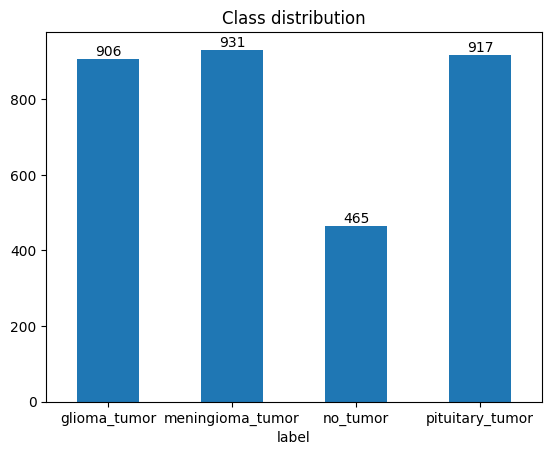

In [ ]:
label_mapping = {
     0:'glioma_tumor',
     1: 'meningioma_tumor',
    2: 'no_tumor',
     3:'pituitary_tumor',
}
df = pd.DataFrame({"label":y_labels})
df['label'] = df['label'].map(label_mapping)



ax = df['label'].value_counts().sort_index().plot(kind='bar')
for i, count in enumerate(df['label'].value_counts().sort_index()):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xticks(rotation = 0)
plt.title('Class distribution')
plt.show()

## Plot the images

### Visualize at least one image per class.

##### Investigate Visually whether there are any corrupted images or not.


In [ ]:
if corrupted_images:
    print("Corrupted images found:")
    for image_path in corrupted_images:
        print(image_path)
else:
    print("No corrupted images found.")

No corrupted images found.


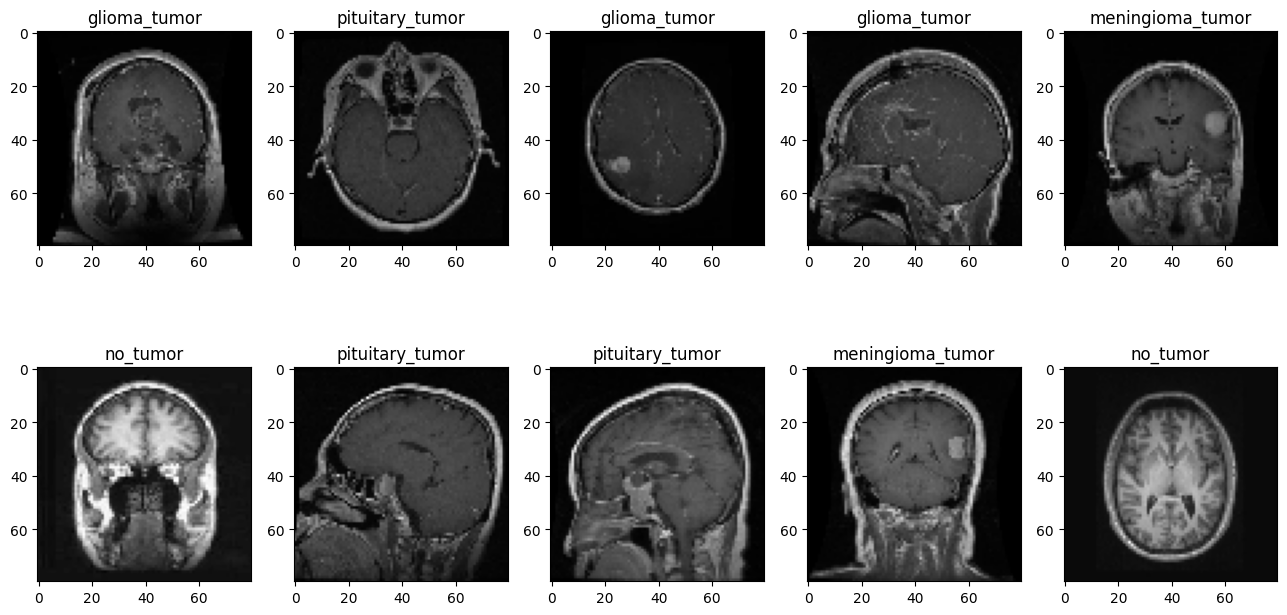

In [ ]:

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 8))
for i in range(2):
    for j in range(5):
        if corrupted_images:

            image_path = corrupted_images.pop(0)
            axes[i, j].imshow(plt.imread(image_path))
            axes[i, j].set_title("Corrupted Image")
        else:
            idx = np.random.randint(len(X_data))

            axes[i, j].imshow(X_data[idx].astype(np.uint8))
            axes[i, j].set_title(class_names[y_labels[idx]])
plt.show()

### Data Pre - processing:

In [ ]:

giloma_tumor_directory = base_path+"/glioma_tumor"
no_tumor_directory =  base_path+"/no_tumor"
meningioma_tumor_directory = base_path + "/meningioma_tumor"
pituitary_tumor_directory =  base_path+"/pituitary_tumor"

In [ ]:
image_path = os.path.join(pituitary_tumor_directory,'p (2).jpg')

img = load_img(image_path)
x = img_to_array(img)


x = x.reshape((1,) + x.shape)
print('shape of image', x.shape)

shape of image (1, 512, 512, 3)


In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                             rotation_range=10,fill_mode='nearest')

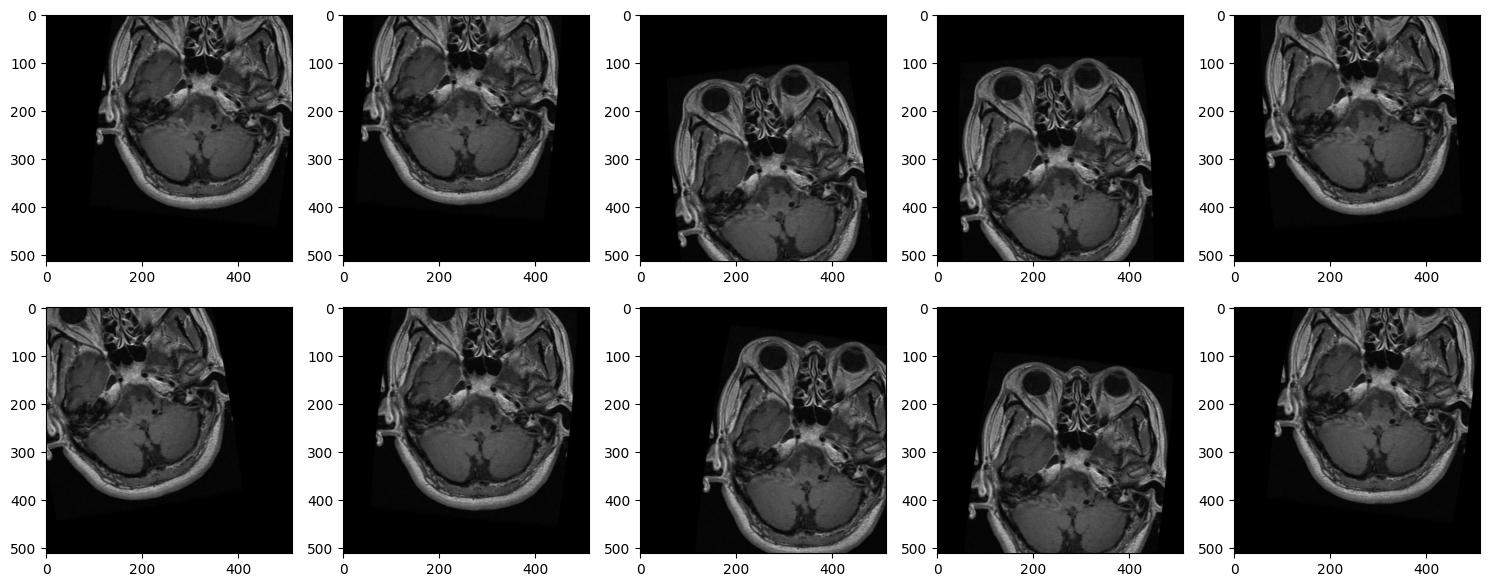

In [ ]:

fig, axes = plt.subplots(2, 5, figsize=(15, 6))




for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    if i >= 10:
        break
    row = i // 5
    col = i % 5
    img_to_show = (batch[0]).astype('uint8')
    axes[row][col].imshow(img_to_show)



plt.tight_layout()
plt.show()


#### Perform augmentation

In [ ]:
image_data = []
image_labels = []
input_dimension = 80
image_dimensions = (input_dimension, input_dimension)

image_data = []
image_labels = []
input_dimension = 80
image_dimensions = (input_dimension, input_dimension)

for class_folder in os.listdir(base_path):
    class_folder_path = os.path.join(base_path, class_folder)

    for sub_folder in os.listdir(class_folder_path):
        sub_folder_path = os.path.join(class_folder_path, sub_folder)

        if os.path.isdir(sub_folder_path):  # Checking for our classes
            for image_file in os.listdir(sub_folder_path):
                if image_file.endswith((".jpeg", ".jpg", ".png")):
                    image_path = os.path.join(sub_folder_path, image_file)
                    image = cv2.imread(image_path)
                    image = cv2.resize(image, image_dimensions)
                    image_data.append(image)
                    image_labels.append(class_folder)
        else:
            if sub_folder_path.endswith((".jpeg", ".jpg", ".png")):
                image = cv2.imread(sub_folder_path)
                image = cv2.resize(image, image_dimensions)
                image_data.append(image)
                image_labels.append(class_folder)

In [ ]:

image_data = np.array(image_data) / 255
image_labels = np.array(image_labels)
print(f'image_data shape:{image_data.shape}')
print(f'image_labels shape:{image_labels.shape}')

image_data shape:(3219, 80, 80, 3)
image_labels shape:(3219,)


In [ ]:
# Performing data augmentation using the image datagenerator from keras
from keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img
imgs= image_data
labels= image_labels
augmentation_rounds =40


augmentor = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                             rotation_range=10,fill_mode='nearest')
augmentor.fit(imgs)

augmented_images =[]
augmented_labels = []

# the augmented images are created and stored in this augmented_images array with augmentaed labels
for image_batch, label_batch in augmentor.flow(imgs, labels, batch_size=32):
    augmented_images.append(image_batch)
    augmented_labels.append(label_batch)
    if len(augmented_images) >= augmentation_rounds:
        break


# The array of our images and augmented images are combined to form our image data and labesl
images_data = np.concatenate((imgs, np.concatenate(augmented_images)))
labels = np.concatenate((labels, np.concatenate(augmented_labels)))

print(f"Combined images shape: {images_data.shape}")
print(f"Combined labels shape: {labels.shape}")
label_dataframe = pd.DataFrame({"label": labels})
print("Label distribution:")
print(label_dataframe["label"].value_counts())

Combined images shape: (4499, 80, 80, 3)
Combined labels shape: (4499,)
Label distribution:
label
meningioma_tumor    1308
pituitary_tumor     1265
glioma_tumor        1262
no_tumor             664
Name: count, dtype: int64


#### spliting the dataset into train and validation

In [ ]:
from sklearn.model_selection import train_test_split

# The images are split into the trainng and testing using the sklearn with test size being 20% of the images and train size being 80%
X_train, X_test, y_train, y_test = train_test_split(images_data, labels, test_size=0.2, random_state=42)



In [ ]:
print(f'X_train shape:{X_train.shape}')
print(f'labels shape:{labels.shape}')
df = pd.DataFrame({"label":labels})
print(df.value_counts())
print("")
print(f'test_date shape:{X_test.shape}')
print(f'test_labels shape:{y_test.shape}')
df = pd.DataFrame({"test_labels":y_test})
print(df.value_counts())

X_train shape:(3599, 80, 80, 3)
labels shape:(4499,)
label           
meningioma_tumor    1308
pituitary_tumor     1265
glioma_tumor        1262
no_tumor             664
Name: count, dtype: int64

test_date shape:(900, 80, 80, 3)
test_labels shape:(900,)
test_labels     
meningioma_tumor    264
pituitary_tumor     262
glioma_tumor        253
no_tumor            121
Name: count, dtype: int64


#### Normalize the image data and convert the lables into one hot encoding

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train) # we are rescaling the images to normalize them

# our training is converted into the label encoder using the label encoder
y_train_one_hot = to_categorical(y_train, num_classes=4)

y_test = le.fit_transform(y_test)
y_test_one_hot = to_categorical(y_test, num_classes=4)

#### Plot the resize images

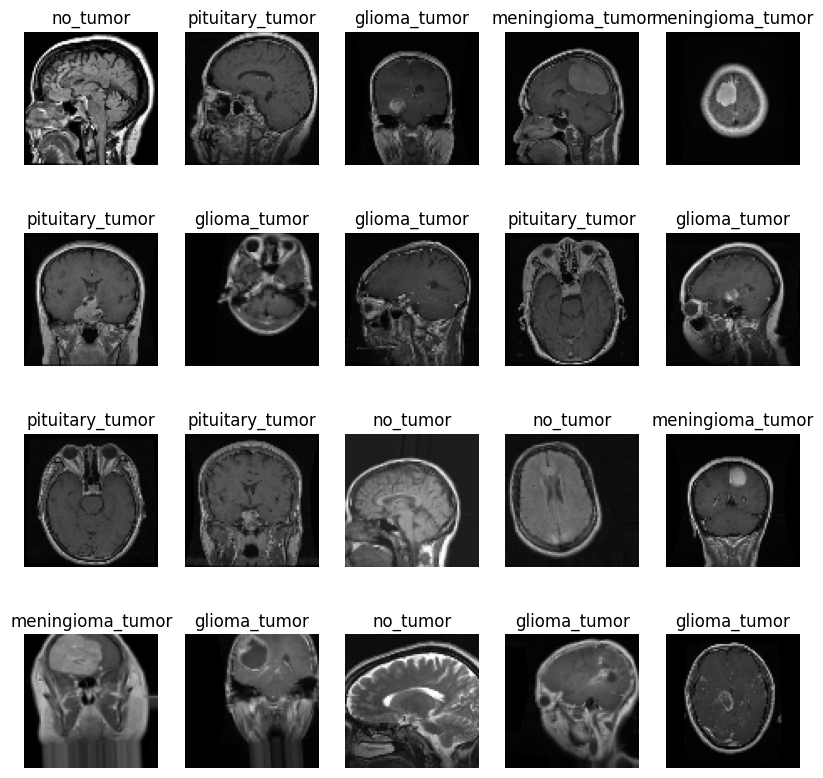

In [ ]:
'''
Show a sample of images from the dataset
'''

import matplotlib.pyplot as plt

# Load the data
data = images_data


indices = np.random.randint(0, len(data), 20)


sample_images = data[indices]


fig = plt.figure(figsize=(10,10))
for i, img in enumerate(sample_images):
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(labels[indices[i]])

plt.show()

## Task2: Building Fully Connected Neural Network

#### FCN Model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


num_classes = 4
input_size =80
tf.random.set_seed(42)
model_fcn = keras.Sequential([

    layers.Rescaling(1./255, input_shape=(input_size, input_size, 3)),
    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),


    layers.Dense(num_classes, activation='softmax')
])

In [ ]:

model_fcn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_fcn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 80, 80, 3)         0         
                                                                 
 flatten_1 (Flatten)         (None, 19200)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               4915456   
                                                                 
 batch_normalization_3 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                      

#### Train the model

In [ ]:
epochs = 15
# model training
history_fcn= model_fcn.fit(
    X_train,
     y_train_one_hot,
    batch_size=32,
    epochs=epochs ,
    validation_split=0.2
)
model_fcn.save_weights(f'epochs{epochs}_fcn.h5')

Epoch 1/15
90/90 [==============================] - 8s 14ms/step - loss: 1.3391 - accuracy: 0.5054 - val_loss: 1.3744 - val_accuracy: 0.2806
Epoch 2/15
90/90 [==============================] - 1s 9ms/step - loss: 1.0783 - accuracy: 0.5766 - val_loss: 1.2872 - val_accuracy: 0.4514
Epoch 3/15
90/90 [==============================] - 1s 9ms/step - loss: 0.9588 - accuracy: 0.6151 - val_loss: 1.2360 - val_accuracy: 0.4611
Epoch 4/15
90/90 [==============================] - 1s 9ms/step - loss: 0.8440 - accuracy: 0.6600 - val_loss: 1.1383 - val_accuracy: 0.5181
Epoch 5/15
90/90 [==============================] - 1s 9ms/step - loss: 0.7715 - accuracy: 0.6992 - val_loss: 0.9264 - val_accuracy: 0.6542
Epoch 6/15
90/90 [==============================] - 1s 8ms/step - loss: 0.7104 - accuracy: 0.7204 - val_loss: 0.8330 - val_accuracy: 0.6625
Epoch 7/15
90/90 [==============================] - 1s 9ms/step - loss: 0.6598 - accuracy: 0.7391 - val_loss: 1.0507 - val_accuracy: 0.5847
Epoch 8/15
90/90 [=

#### Evaluate the model

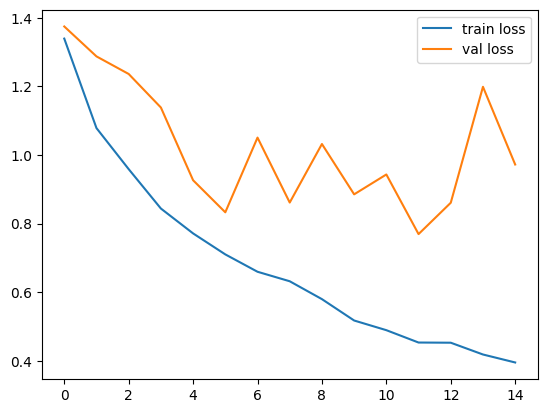

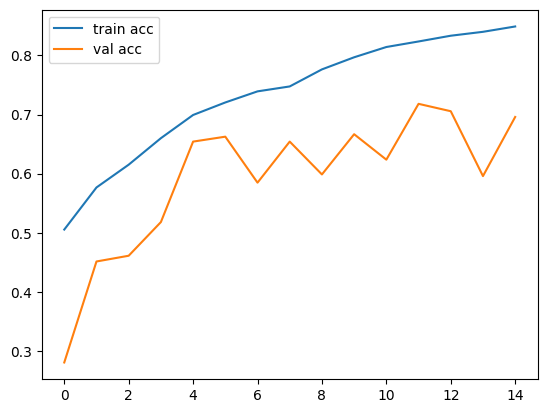

<Figure size 640x480 with 0 Axes>

In [ ]:

# Plotting the loss graph for training loss and validationa loss
plt.plot(history_fcn.history['loss'], label='train loss')
plt.plot(history_fcn.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plotting the accuracy graph for train acc and val acc
plt.plot(history_fcn.history['accuracy'], label='train acc')
plt.plot(history_fcn.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Other metrics for model evalutaion

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

y_pred = model_fcn.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy:", accuracy)


print("Confusion matrix:")
confusion_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print(confusion_matrix)

print("\nClassification report:")
print(classification_report(y_true_classes, y_pred_classes))

print("\nAccuracy score:", accuracy_score(y_true_classes, y_pred_classes))
print("F1 score:", f1_score(y_true_classes, y_pred_classes, average='weighted'))


29/29 [==============================] - 0s 4ms/step
Accuracy: 0.7122222222222222
Confusion matrix:
[[217  23   2  11]
 [104 137  10  13]
 [ 14  14  89   4]
 [ 44  12   8 198]]

Classification report:
              precision    recall  f1-score   support

           0       0.57      0.86      0.69       253
           1       0.74      0.52      0.61       264
           2       0.82      0.74      0.77       121
           3       0.88      0.76      0.81       262

    accuracy                           0.71       900
   macro avg       0.75      0.72      0.72       900
weighted avg       0.74      0.71      0.71       900


Accuracy score: 0.7122222222222222
F1 score: 0.7119267156408192


<Axes: >

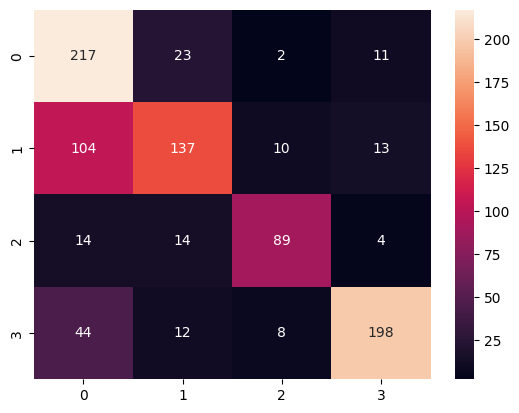

In [ ]:
# Plotting our confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True, fmt='d')

#### Predict the model

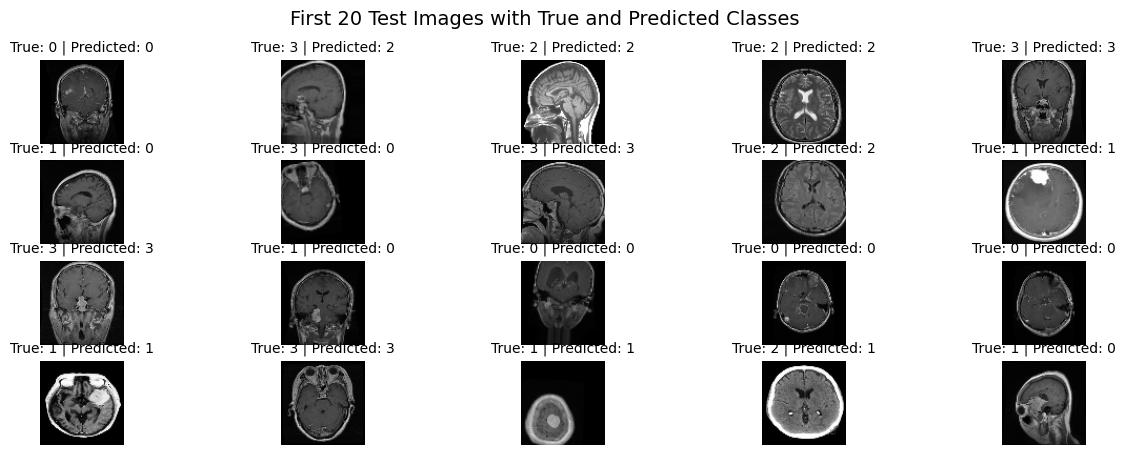

In [ ]:

# Prediction of the model on the unseen datasets
num_images = 20


plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(4, 5, i + 1)
    plt.imshow((X_test[i] * 255).astype(np.uint8))
    plt.axis('off')


    title = f"True: {y_true_classes[i]} | Predicted: {y_pred_classes[i]}"
    plt.title(title, fontsize=10)

plt.suptitle("First 20 Test Images with True and Predicted Classes", fontsize=14)
plt.show()

## Task3: Building Convolutional Neural Network


#### CNN Block with FCN

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers

input_size = 80

tf.random.set_seed(666)

model_cnn = keras.Sequential([
    # first convolution layer with relu activation for 32 blocks and max pooling layer
        keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(input_size,input_size,3)),
        keras.layers.Conv2D(32, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(0.2),

        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(0.2),

        keras.layers.Conv2D(256, (3,3), activation='relu'),
        keras.layers.Conv2D(256, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(0.2),

        keras.layers.Flatten(),
        keras.layers.Dense(1024, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4, activation='softmax')
    ])



In [ ]:
model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
) # compiling the model using the admin optimizer and categorical crossentropy loss function

model_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 78, 78, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 76, 76, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 38, 38, 32)        0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 38, 38, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 36, 36, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 34, 34, 64)        36928     
                                                      

#### Train the CNN model

In [ ]:
epochs = 15
history_cnn= model_cnn.fit(
    X_train,
     y_train_one_hot,
    batch_size=32,
    epochs=epochs ,
    validation_split=0.2
)
model_cnn.save_weights(f'epochs{epochs}_cnn.h5')

Epoch 1/15
90/90 [==============================] - 11s 52ms/step - loss: 1.2544 - accuracy: 0.4147 - val_loss: 1.1125 - val_accuracy: 0.5181
Epoch 2/15
90/90 [==============================] - 2s 27ms/step - loss: 0.9660 - accuracy: 0.5773 - val_loss: 1.0705 - val_accuracy: 0.5292
Epoch 3/15
90/90 [==============================] - 2s 26ms/step - loss: 0.8283 - accuracy: 0.6527 - val_loss: 0.9777 - val_accuracy: 0.5764
Epoch 4/15
90/90 [==============================] - 2s 26ms/step - loss: 0.7450 - accuracy: 0.6839 - val_loss: 0.7900 - val_accuracy: 0.6500
Epoch 5/15
90/90 [==============================] - 2s 26ms/step - loss: 0.6630 - accuracy: 0.7166 - val_loss: 0.6530 - val_accuracy: 0.7236
Epoch 6/15
90/90 [==============================] - 2s 27ms/step - loss: 0.5864 - accuracy: 0.7551 - val_loss: 0.7069 - val_accuracy: 0.7306
Epoch 7/15
90/90 [==============================] - 3s 30ms/step - loss: 0.5249 - accuracy: 0.7763 - val_loss: 0.6488 - val_accuracy: 0.7389
Epoch 8/15
9

#### Evaluation of CNN model

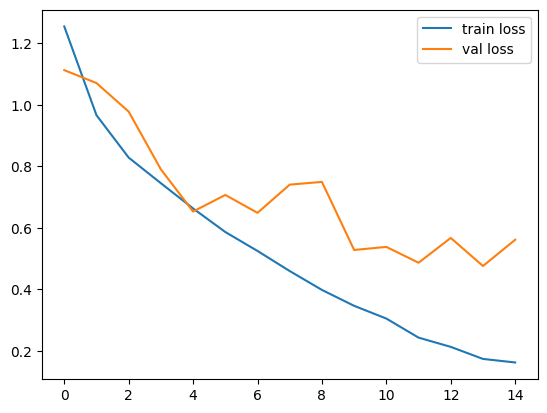

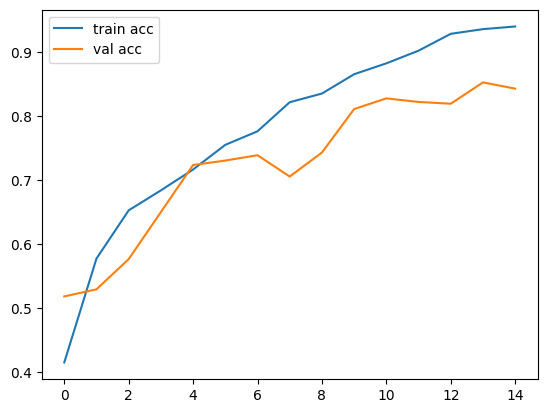

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plotting for the train loss and validation loss
plt.plot(history_cnn.history['loss'], label='train loss')
plt.plot(history_cnn.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plotting for the train accuracy and validation accuracy
plt.plot(history_cnn.history['accuracy'], label='train acc')
plt.plot(history_cnn.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#### Prediction of CNN model

In [ ]:
# Evalution ofthe CNNmodle on other metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

y_pred = model_cnn.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy:", accuracy)

print("Confusion matrix:")
confusion_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print(confusion_matrix)

print("\nClassification report:")
print(classification_report(y_true_classes, y_pred_classes))

print("\nAccuracy score:", accuracy_score(y_true_classes, y_pred_classes))
print("F1 score:", f1_score(y_true_classes, y_pred_classes, average='weighted'))


29/29 [==============================] - 1s 17ms/step
Accuracy: 0.8377777777777777
Confusion matrix:
[[225  15   0  13]
 [ 55 179  12  18]
 [  9   6 103   3]
 [ 10   3   2 247]]

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.82       253
           1       0.88      0.68      0.77       264
           2       0.88      0.85      0.87       121
           3       0.88      0.94      0.91       262

    accuracy                           0.84       900
   macro avg       0.85      0.84      0.84       900
weighted avg       0.84      0.84      0.84       900


Accuracy score: 0.8377777777777777
F1 score: 0.8352439146170718


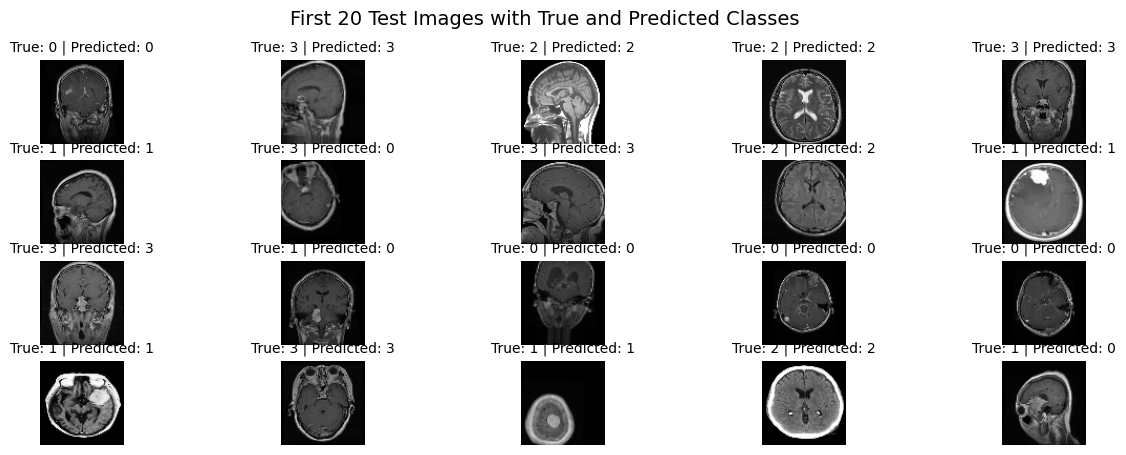

In [ ]:
# Testing theimages with the true classs and predicted class
num_images = 20

plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(4, 5, i + 1)
    plt.imshow((X_test[i] * 255).astype(np.uint8))
    plt.axis('off')


    title = f"True: {y_true_classes[i]} | Predicted: {y_pred_classes[i]}"
    plt.title(title, fontsize=10)

plt.suptitle("First 20 Test Images with True and Predicted Classes", fontsize=14)
plt.show()

1/1 [==============================] - 0s 466ms/step


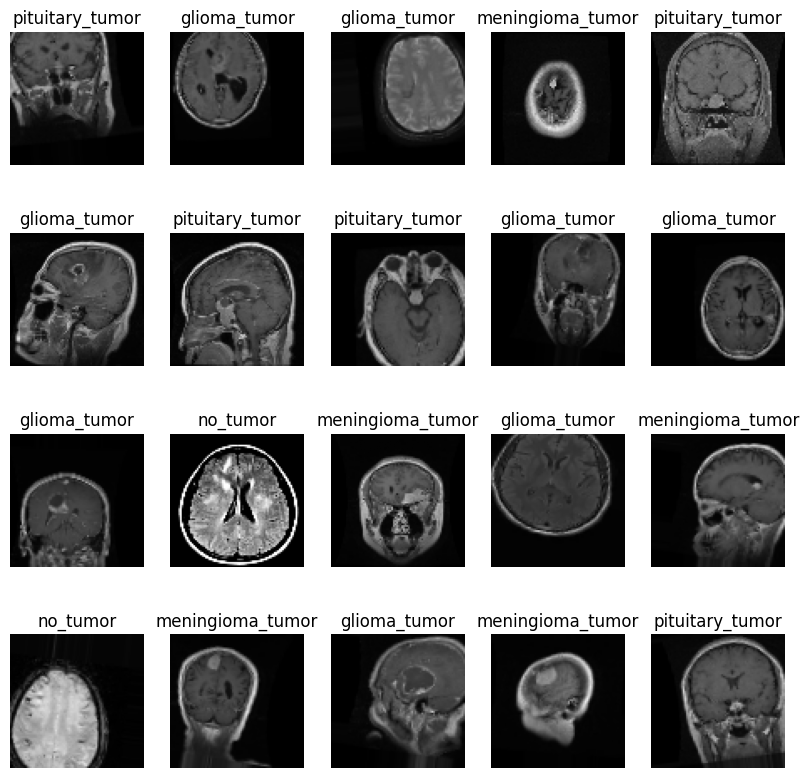

In [ ]:
# Prediction of our model on the dataset
import numpy as np
import matplotlib.pyplot as plt

indices = np.random.randint(0, len(X_test), 20)
sample_images = X_test[indices]

predictions = model_cnn.predict(sample_images)

class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

fig = plt.figure(figsize=(10,10))
for i, img in enumerate(sample_images):
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    predicted_class = class_names[np.argmax(predictions[i])]
    plt.title(predicted_class)

plt.show()

## Task4: Transfer Learning.

#### Build the MobileNetV2 using pretrained Weights

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf
tf.random.set_seed(666)


X_train = X_train
y_train = y_train_one_hot
input_shape = (input_size, input_size, 3)

# Building them model where the top layer (FCNN layer is not taken from the pretained model )
base_model = MobileNetV2(include_top=False, input_shape=input_shape)




#### Restructure the model

In [ ]:
# Freeze the other layers for the model
for layer in base_model.layers:
    layer.trainable = False

# Building a new fcnn outer layer on top of the basemodel (fine tunning)
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(4, activation='softmax')(x)


# creating our trasfer learning model
transfer_learning_model = Model(inputs=base_model.input, outputs=x)

transfer_learning_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



#### Train the MobileNetV2 model with modified FCN layer

In [ ]:
# Mobile net v2 model
history_MobileNetV2 = transfer_learning_model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)
print("Test accuracy: ", max(history_MobileNetV2.history['val_accuracy']))


Epoch 1/10
90/90 [==============================] - 9s 43ms/step - loss: 1.8270 - accuracy: 0.6836 - val_loss: 0.5237 - val_accuracy: 0.7986
Epoch 2/10
90/90 [==============================] - 1s 13ms/step - loss: 0.3740 - accuracy: 0.8534 - val_loss: 0.4916 - val_accuracy: 0.8236
Epoch 3/10
90/90 [==============================] - 1s 13ms/step - loss: 0.3260 - accuracy: 0.8788 - val_loss: 0.4903 - val_accuracy: 0.8181
Epoch 4/10
90/90 [==============================] - 1s 15ms/step - loss: 0.2082 - accuracy: 0.9212 - val_loss: 0.4825 - val_accuracy: 0.8431
Epoch 5/10
90/90 [==============================] - 1s 17ms/step - loss: 0.1213 - accuracy: 0.9601 - val_loss: 0.4299 - val_accuracy: 0.8431
Epoch 6/10
90/90 [==============================] - 1s 16ms/step - loss: 0.0722 - accuracy: 0.9826 - val_loss: 0.4335 - val_accuracy: 0.8556
Epoch 7/10
90/90 [==============================] - 1s 14ms/step - loss: 0.0488 - accuracy: 0.9917 - val_loss: 0.4002 - val_accuracy: 0.8764
Epoch 8/10
90

### Evaluation of the MobileNetV2 model

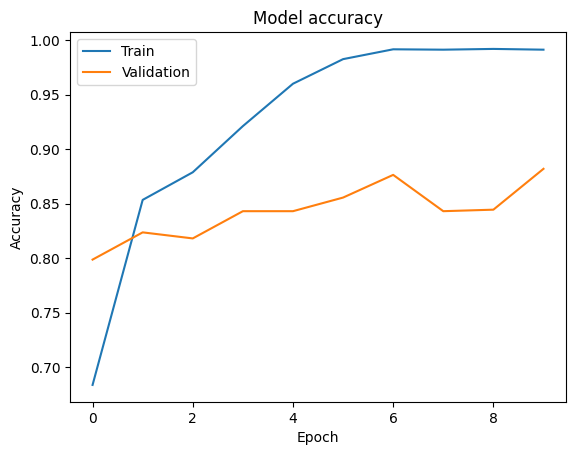

In [ ]:
# Plotting hte validation accuracy and thetrainig accuracy
plt.plot(history_MobileNetV2.history['accuracy'])
plt.plot(history_MobileNetV2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


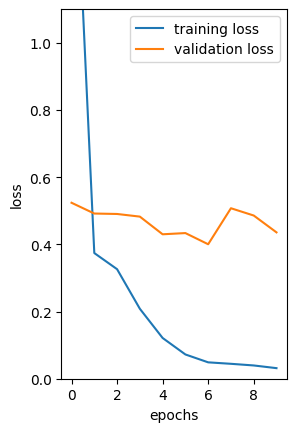

In [ ]:
# Plotting the trainingloss and the validation loss of our model
plt.subplot(1,2,1)
plt.plot(history_MobileNetV2.history['loss'], label='training loss')
plt.plot(history_MobileNetV2.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.ylim(0,1.1)
plt.show()

In [ ]:
loss, accuracy = transfer_learning_model.evaluate(X_test, y_test_one_hot, verbose=0)
# Here the test loss can be seen higher maybe its because our model complexity is not
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Test loss: 0.42644912004470825
Test accuracy: 0.8611111044883728


In [ ]:
y_pred = transfer_learning_model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_one_hot, axis=1)

# Calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy:", accuracy)

29/29 [==============================] - 2s 14ms/step
Accuracy: 0.8611111111111112


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

print("Confusion matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

print("\nClassification report:")
print(classification_report(y_test_classes, y_pred_classes))

print("\nAccuracy score:", accuracy_score(y_test_classes, y_pred_classes))
print("F1 score:", f1_score(y_test_classes, y_pred_classes, average='weighted'))

Confusion matrix:
[[212  30   2   9]
 [ 42 204   6  12]
 [  7   4 107   3]
 [  1   7   2 252]]

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       253
           1       0.83      0.77      0.80       264
           2       0.91      0.88      0.90       121
           3       0.91      0.96      0.94       262

    accuracy                           0.86       900
   macro avg       0.87      0.86      0.87       900
weighted avg       0.86      0.86      0.86       900


Accuracy score: 0.8611111111111112
F1 score: 0.8601675281985292


#### Comparision of three different model

In [ ]:
# Takingthe validation accuracy result of each of the model
val_acc_fcn = history_fcn.history['val_accuracy'][-1]
val_acc_cnn = history_cnn.history['val_accuracy'][-1]
val_acc_MobileNetV2 = history_MobileNetV2.history['val_accuracy'][-1]

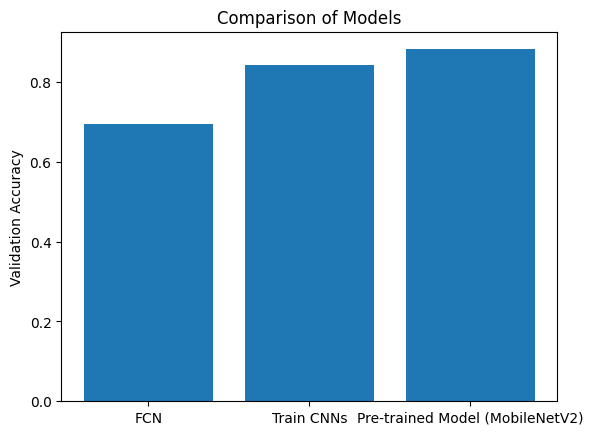

In [ ]:
fig, ax = plt.subplots()
models = ['FCN','Train CNNs', 'Pre-trained Model (MobileNetV2)']
val_accs = [val_acc_fcn,val_acc_cnn, val_acc_MobileNetV2]
ax.bar(models, val_accs)
ax.set_ylabel('Validation Accuracy')
ax.set_title('Comparison of Models')
plt.show()


The best results were produced by transfer learning using fine tuning, followed by the fully connected neural networks (FCNN) and then the convolutional neural networks (CNN) , according to the evaluation metrics that were used during the training of the model.

**Reasoning:**





**Transfer learning with fine-tuning:** This strategy uses pre-trained models, which showed skill to generalize from the big-scale data. The models in question serve the purpose of fine-tuning the features to the data-specific properties by means of the process of optimization that includes cutting-edge machine learning techniques.Transfer learning has the highest accuracy above all the models which is 86%. This method surpasses the traditional starting from scratch because it uses the pretrained fashions' ability to generalize and to catch the complex patterns. Another aspect would be a test for the transfer learning, which shows that the model has a 86% accuracy of prediction, implying that the model equally excels in generalization in the facts checked.


**Fully related neural network (FCNN):** FCNN was able to earn a accuracy of approximately 83%, but transfer learning surpassed check accuracy.
FCN had the worst result when tested on the prediction set and it was the lowest of the other three schemes..For many use situations, FCNNs are honest and productive, but they are quite unfavorable for spatial connectivity and local resolution in photographs, especially if they deal with high quality inputs like photos. In addition, they may not have the same performance gains as more sophisticated architectures like CNNs or transfer learning techniques that are specifically trained for image classification tasks.





**Convolutional Neural Network (CNN):** The test accuracy is 80%.  The CNNs mostly followed with image-related tasks due to the fact that they can capture spatial structures and aspects of local processes in images through the use of convolutional processes, but it is assumed that it may be possible that FCNNs can provide enough information or may result in better accuracy. In summary, the transfer learning by fine-tuning outperformed CNN and FCNN because it utilized the pre-trained models efficiently and customized them to the target dataset met, thus leading to the improved generalizability and overall performance in the image classification tasks.